In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#/content/drive/MyDrive/datasets/without_bg
#/content/drive/MyDrive/datasets/model.h5

Mounted at /content/drive


In [ ]:
from tensorflow import keras

model = keras.models.load_model('/content/drive/MyDrive/datasets/model.m5')

model.compile(optimizer="adam",
              metrics=['accuracy'],
              loss="categorical_crossentropy")

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input
import numpy as np
import os

test_img_path = os.popen('ls /content/drive/MyDrive/datasets/without_bg | shuf -n 1').read().replace('\n', '')
test_img_path = '/content/drive/MyDrive/datasets/without_bg/' + test_img_path 

img = image.load_img(test_img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = preprocess_input(x)

In [ ]:
x.shape

(150, 150, 3)

In [ ]:
x = np.expand_dims(x, axis=0)

In [ ]:
x.shape

(1, 150, 150, 3)

In [ ]:
predictions = model.predict(x)

1/1 [==============================] - 0s 117ms/step


In [ ]:
predictions

array([[7.90373544e-09, 3.69978055e-13, 8.02776789e-10, 1.87608817e-09,
        6.21583210e-12, 1.14659948e-10, 1.12093295e-08, 3.01088554e-09,
        9.99957204e-01, 8.92189878e-10, 3.52066258e-11, 2.95449496e-07,
        4.24564932e-05, 1.84407334e-09, 5.06320486e-10, 4.89616958e-10,
        1.11925476e-10]], dtype=float32)

In [ ]:
classes = {0: 'Blazer',
 1: 'Blouse',
 2: 'Body',
 3: 'Dress',
 4: 'Hat',
 5: 'Hoodie',
 6: 'Longsleeve',
 7: 'Outwear',
 8: 'Pants',
 9: 'Polo',
 10: 'Shirt',
 11: 'Shoes',
 12: 'Shorts',
 13: 'Skirt',
 14: 'T-Shirt',
 15: 'Top',
 16: 'Undershirt'}

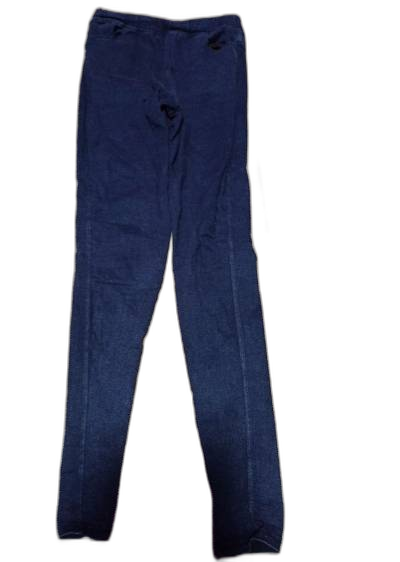

In [ ]:
from IPython.display import Image
Image(filename=test_img_path) 

In [ ]:
prediction_index = np.argmax(predictions, axis=1)[0]
print(classes[prediction_index])

Pants


In [ ]:
proba = float(np.max(predictions, axis=1)) * 100
proba_label = "{:.2f}%".format(proba)
print(proba_label)

100.00%
